In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking for the outliers in dataset

In [6]:
l1=df.describe().columns
l1

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
for i in l1:
    print(df[i].value_counts())
    print("*"*50)

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64
**************************************************
volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64
**************************************************
citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64
**************************************************
residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64
**************************************************
chlorides
0.080    66
0.074    55
0.076    51
0.078    51

# Visualizing the outliers through boxplot

In [8]:
df["pH"].value_counts

<bound method IndexOpsMixin.value_counts of 0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
        ... 
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64>

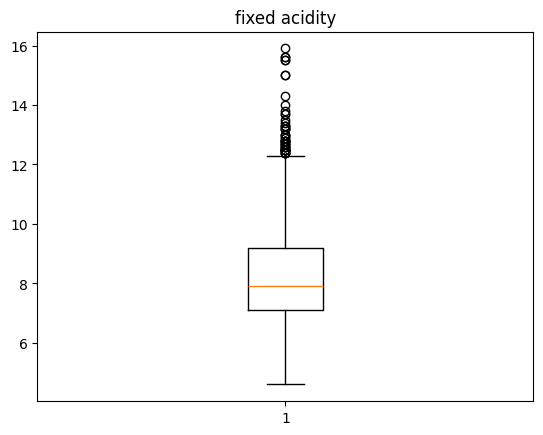

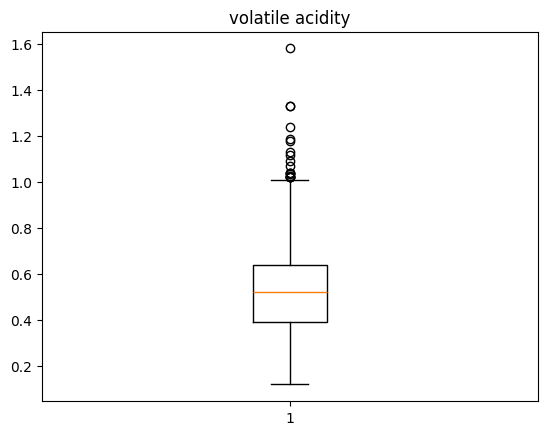

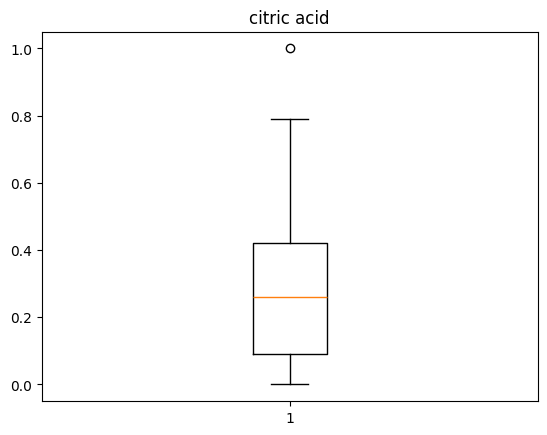

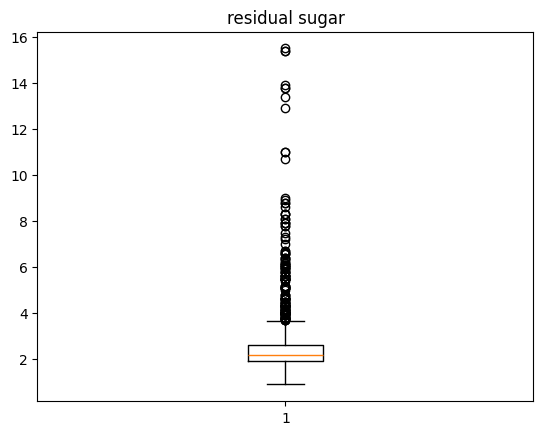

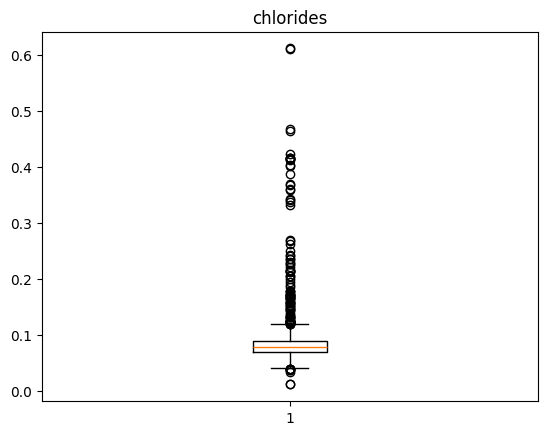

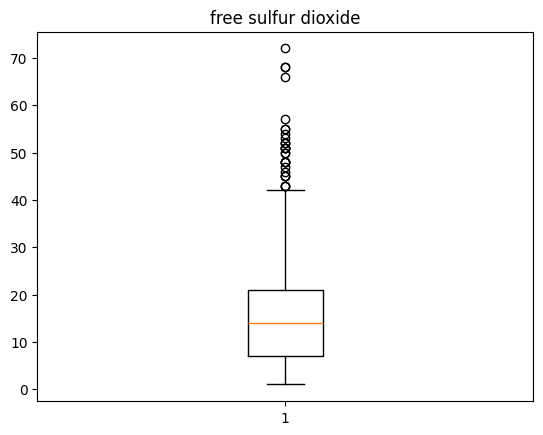

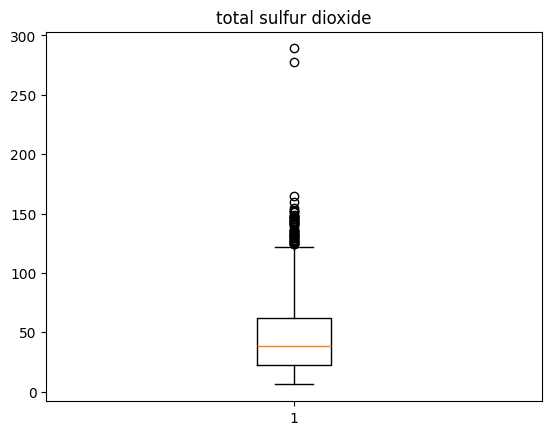

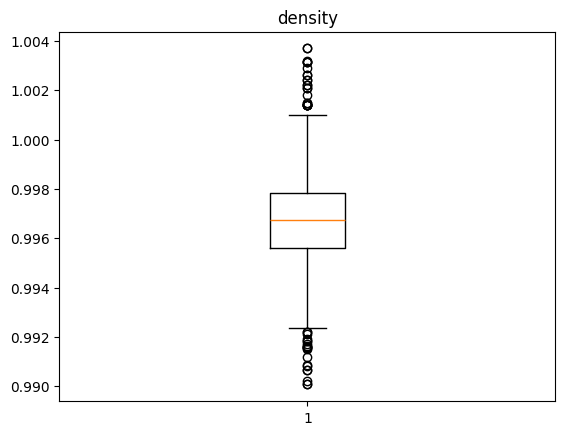

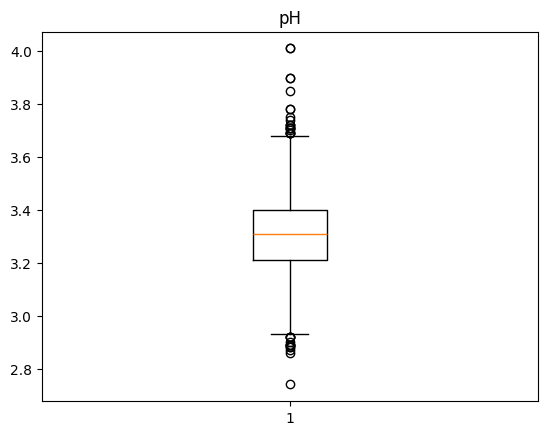

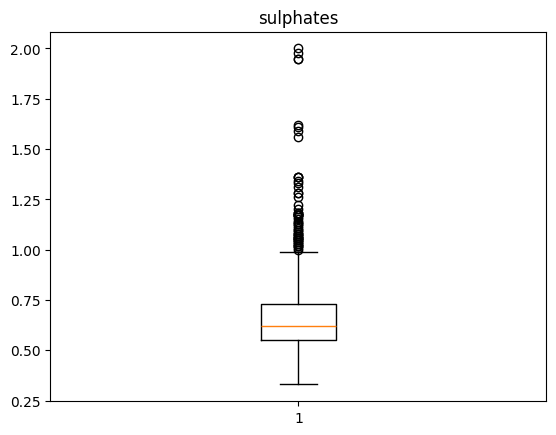

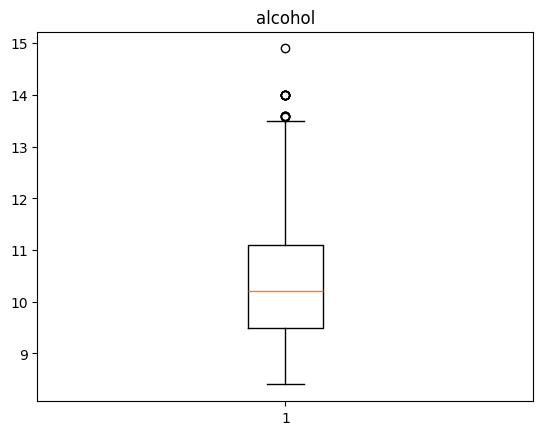

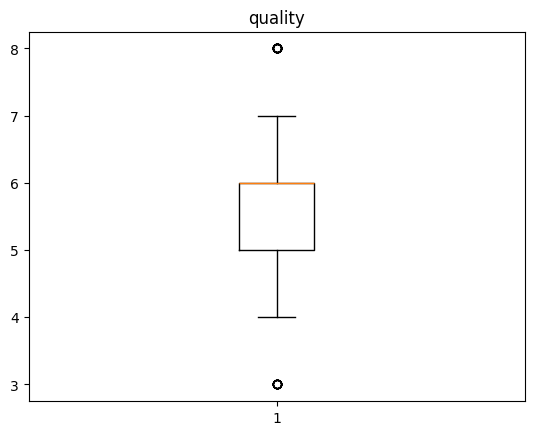

In [9]:
for i in l1:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [10]:
# outliers present in columns are:
# 1.fixed acidity
# 2.volatile acidity
# 3.citric acid
# 4.residual sugar
# 5.chlorides
# 6.free sulfur dioxide
# 7.total sulfur dioxide
# 8.density
# 9.pH
# 10.alcohol
# 11.quality

In [11]:
# fixed acidity

q1=df['fixed acidity'].quantile(0.25)
q3=df['fixed acidity'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 7.1
q3 9.2
iqr 2.0999999999999996
upper_tail 12.349999999999998
lower_tail 3.95


In [12]:
df.loc[df['fixed acidity']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


In [13]:
df.loc[df['fixed acidity']>upper_bound,'fixed acidity']=upper_bound

In [14]:
df.loc[df['fixed acidity']>upper_bound] #outliers are removed.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [15]:
# volatile acidity

q1=df['volatile acidity'].quantile(0.25)
q3=df['volatile acidity'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 0.39
q3 0.64
iqr 0.25
upper_tail 1.0150000000000001
lower_tail 0.015000000000000013


In [16]:
df.loc[df['volatile acidity']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


In [17]:
df.loc[df['volatile acidity']>upper_bound,'volatile acidity']=upper_bound

In [18]:
df.loc[df['volatile acidity']>upper_bound]  #outliers are removed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [19]:
# citric acid

q1=df['citric acid'].quantile(0.25)
q3=df['citric acid'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 0.09
q3 0.42
iqr 0.32999999999999996
upper_tail 0.9149999999999999
lower_tail -0.4049999999999999


In [20]:
df.loc[df['citric acid']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [21]:
df.loc[df['citric acid']>upper_bound,'citric acid']=upper_bound

In [22]:
df.loc[df['citric acid']>upper_bound] #outlier are removed.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [23]:
# residual sugar

q1=df['residual sugar'].quantile(0.25)
q3=df['residual sugar'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 1.9
q3 2.6
iqr 0.7000000000000002
upper_tail 3.6500000000000004
lower_tail 0.8499999999999996


In [24]:
df.loc[df['residual sugar']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


In [25]:
df.loc[df['residual sugar']>upper_bound,'residual sugar']=upper_bound

In [26]:
df.loc[df['residual sugar']>upper_bound] #outliers are removed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [27]:
# chlorides

q1=df['chlorides'].quantile(0.25)
q3=df['chlorides'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 0.07
q3 0.09
iqr 0.01999999999999999
upper_tail 0.11999999999999998
lower_tail 0.04000000000000002


In [28]:
df.loc[df['chlorides']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.65,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.65,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.560,0.28,1.70,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.80,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.015,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,10.0,0.380,0.38,1.60,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
1474,9.9,0.500,0.50,3.65,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1476,9.9,0.500,0.50,3.65,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1558,6.9,0.630,0.33,3.65,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5


In [29]:
df.loc[df['chlorides']>upper_bound,'chlorides']=upper_bound

In [30]:
df.loc[df['chlorides']>upper_bound] #outliers are removed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [31]:
df.loc[df['chlorides']<lower_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
210,9.7,0.53,0.60,2.0,0.039,5.0,19.0,0.99585,3.30,0.86,12.4,6
688,7.7,0.66,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5
695,5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,6
797,9.3,0.37,0.44,1.6,0.038,21.0,42.0,0.99526,3.24,0.81,10.8,7
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
837,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7
861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
1571,6.4,0.38,0.14,2.2,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6


In [32]:
df.loc[df['chlorides']<lower_bound,'chlorides']=lower_bound

In [33]:
df.loc[df['chlorides']<lower_bound] #outliers are removed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [34]:
# free sulfur dioxide

q1=df['free sulfur dioxide'].quantile(0.25)
q3=df['free sulfur dioxide'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 7.0
q3 21.0
iqr 14.0
upper_tail 42.0
lower_tail -14.0


In [35]:
df.loc[df['free sulfur dioxide']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.65,0.120,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.65,0.120,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,3.65,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,3.65,0.120,68.0,124.0,0.99940,3.47,0.53,9.9,5
400,6.6,0.735,0.02,3.65,0.120,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


In [36]:
df.loc[df['free sulfur dioxide']>upper_bound,'free sulfur dioxide']=upper_bound

In [37]:
df.loc[df['free sulfur dioxide']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [38]:
# total sulfur dioxide

q1=df['total sulfur dioxide'].quantile(0.25)
q3=df['total sulfur dioxide'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 22.0
q3 62.0
iqr 40.0
upper_tail 122.0
lower_tail -38.0


In [39]:
df.loc[df['total sulfur dioxide']>upper_bound]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.65,0.120,42.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.65,0.120,42.0,148.0,0.99860,3.17,0.93,9.2,5
86,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.10,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
90,7.9,0.520,0.26,1.90,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
92,8.6,0.490,0.29,2.00,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
109,8.1,0.785,0.52,2.00,0.120,37.0,153.0,0.99690,3.21,0.69,9.3,5
130,8.0,0.745,0.56,2.00,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.80,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5


In [40]:
df.loc[df['total sulfur dioxide']>upper_bound,'total sulfur dioxide']=upper_bound

In [41]:
df.loc[df['total sulfur dioxide']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [42]:
# density

q1=df['density'].quantile(0.25)
q3=df['density'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)


q1 0.9956
q3 0.997835
iqr 0.002234999999999987
upper_tail 1.0011875
lower_tail 0.9922475000000001


In [43]:
df.loc[df['density']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,12.35,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
324,10.00,0.490,0.20,3.65,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
325,10.00,0.490,0.20,3.65,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
353,12.35,0.530,0.79,3.65,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
364,12.35,0.615,0.66,3.65,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
366,12.35,0.615,0.66,3.65,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
374,12.35,0.410,0.63,3.65,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
381,12.35,0.415,0.68,2.90,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6
391,12.35,0.415,0.68,2.90,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6
415,8.60,0.725,0.24,3.65,0.117,31.0,122.0,1.00140,3.32,1.07,9.3,5


In [44]:
df.loc[df['density']>upper_bound,'density']=upper_bound

In [45]:
df.loc[df['density']<lower_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
354,6.1,0.21,0.40,1.40,0.066,40.5,122.0,0.99120,3.25,0.59,11.900000,6
588,5.0,0.42,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
591,6.6,0.39,0.49,1.70,0.070,23.0,122.0,0.99220,3.12,0.50,11.500000,6
695,5.1,0.47,0.02,1.30,0.040,18.0,44.0,0.99210,3.90,0.62,12.800000,6
821,4.9,0.42,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
836,6.7,0.28,0.28,2.40,0.040,36.0,100.0,0.99064,3.26,0.39,11.700000,7
837,6.7,0.28,0.28,2.40,0.040,36.0,100.0,0.99064,3.26,0.39,11.700000,7
999,6.4,0.69,0.00,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.900000,6


In [46]:
df.loc[df['density']<lower_bound,'density']=lower_bound

In [47]:
df.loc[df['density']<lower_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [48]:
# pH

q1=df['pH'].quantile(0.25)
q3=df['pH'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 3.21
q3 3.4
iqr 0.18999999999999995
upper_tail 3.6849999999999996
lower_tail 2.925


In [49]:
df.loc[df['pH']>upper_bound]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.993400,3.90,0.56,13.1,4
94,5.0,1.015,0.04,1.40,0.045,41.0,85.0,0.993800,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.993200,3.85,0.60,12.9,6
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.998700,3.69,0.91,9.4,6
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.998700,3.69,0.91,9.4,6
553,5.0,1.015,0.24,1.60,0.050,32.0,96.0,0.993400,3.74,0.62,11.5,5
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.992248,3.72,0.74,14.0,8
695,5.1,0.470,0.02,1.30,0.040,18.0,44.0,0.992248,3.90,0.62,12.8,6
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.992248,3.71,0.74,14.0,7
930,6.6,0.610,0.01,1.90,0.080,8.0,25.0,0.997460,3.69,0.73,10.5,5


In [50]:
df.loc[df['pH']>upper_bound,'pH']=upper_bound

In [51]:
df.loc[df['pH']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [52]:
df.loc[df['pH']<lower_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.20,0.520,0.915,3.40,0.120,32.0,69.0,0.999600,2.74,2.00,9.4,4
440,12.35,0.310,0.720,2.20,0.072,6.0,29.0,0.998700,2.88,0.82,9.8,8
544,12.35,0.310,0.740,1.80,0.075,6.0,15.0,1.000800,2.86,0.79,8.4,6
554,12.35,0.645,0.490,3.65,0.095,10.0,23.0,1.001187,2.92,0.74,11.1,5
555,12.35,0.645,0.490,3.65,0.095,10.0,23.0,1.001187,2.92,0.74,11.1,5
557,12.35,0.645,0.490,3.65,0.095,10.0,23.0,1.001187,2.92,0.74,11.1,5
614,9.20,0.755,0.180,2.20,0.120,10.0,103.0,0.996900,2.87,1.36,10.2,6
650,10.70,0.430,0.390,2.20,0.106,8.0,32.0,0.998600,2.89,0.50,9.6,5
656,10.70,0.430,0.390,2.20,0.106,8.0,32.0,0.998600,2.89,0.50,9.6,5
657,12.00,0.500,0.590,1.40,0.073,23.0,42.0,0.998000,2.92,0.68,10.5,7


In [53]:
df.loc[df['pH']<lower_bound,'pH']=lower_bound

In [54]:
df.loc[df['pH']<lower_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [55]:
# alcohol

q1=df['alcohol'].quantile(0.25)
q3=df['alcohol'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)

q1 9.5
q3 11.1
iqr 1.5999999999999996
upper_tail 13.5
lower_tail 7.1000000000000005


In [56]:
df.loc[df['alcohol']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.20,0.34,0.00,1.80,0.050,27.0,63.0,0.992248,3.680,0.79,14.000000,6
144,5.20,0.34,0.00,1.80,0.050,27.0,63.0,0.992248,3.680,0.79,14.000000,6
467,8.80,0.46,0.45,2.60,0.065,7.0,18.0,0.994700,3.320,0.79,14.000000,6
588,5.00,0.42,0.24,2.00,0.060,19.0,50.0,0.992248,3.685,0.74,14.000000,8
652,12.35,0.36,0.65,3.65,0.096,22.0,71.0,0.997600,2.980,0.84,14.900000,5
821,4.90,0.42,0.00,2.10,0.048,16.0,42.0,0.992248,3.685,0.74,14.000000,7
1114,5.00,0.40,0.50,3.65,0.046,29.0,80.0,0.992248,3.490,0.66,13.600000,6
1132,7.40,0.36,0.34,1.80,0.075,18.0,38.0,0.993300,3.380,0.88,13.600000,7
1228,5.10,0.42,0.00,1.80,0.044,18.0,88.0,0.992248,3.680,0.73,13.600000,7
1269,5.50,0.49,0.03,1.80,0.044,28.0,87.0,0.992248,3.500,0.82,14.000000,8


In [57]:
df.loc[df['alcohol']>upper_bound,'alcohol']=upper_bound

In [58]:
df.loc[df['alcohol']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [59]:
# sulphates

q1=df['sulphates'].quantile(0.25)
q3=df['sulphates'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5 * iqr)
print("q1",q1)
print("q3",q3)
print("iqr",iqr)
print("upper_tail",upper_bound)
print("lower_tail",lower_bound)


q1 0.55
q3 0.73
iqr 0.17999999999999994
upper_tail 0.9999999999999999
lower_tail 0.28000000000000014


In [60]:
df.loc[df['sulphates']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.80,0.610,0.290,1.60,0.114,9.0,29.0,0.997400,3.260,1.56,9.1,5
17,8.10,0.560,0.280,1.70,0.120,16.0,56.0,0.996800,3.110,1.28,9.3,5
19,7.90,0.320,0.510,1.80,0.120,17.0,56.0,0.996900,3.040,1.08,9.2,6
43,8.10,0.660,0.220,2.20,0.069,9.0,23.0,0.996800,3.300,1.20,10.3,5
79,8.30,0.625,0.200,1.50,0.080,27.0,119.0,0.997200,3.160,1.12,9.1,4
81,7.80,0.430,0.700,1.90,0.120,22.0,67.0,0.997400,3.130,1.28,9.4,5
83,7.30,0.670,0.260,1.80,0.120,16.0,51.0,0.996900,3.160,1.14,9.4,5
86,8.60,0.490,0.280,1.90,0.110,20.0,122.0,0.997200,2.930,1.95,9.9,6
88,9.30,0.390,0.440,2.10,0.107,34.0,122.0,0.997800,3.140,1.22,9.5,5
91,8.60,0.490,0.280,1.90,0.110,20.0,122.0,0.997200,2.930,1.95,9.9,6


In [61]:
df.loc[df['sulphates']>upper_bound,'sulphates']=upper_bound

In [62]:
df.loc[df['sulphates']>upper_bound]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [63]:
# Target column is quality

In [64]:
df.corr().tail(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.125442,-0.387608,0.227144,0.02379,-0.183037,-0.050641,-0.201542,-0.17633,-0.061507,0.32871,0.478556,1.0


In [65]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.810500,0.171000,2.370000,0.095600,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.776415,0.687830,0.172547,2.366981,0.079887,12.264151,36.245283,0.996542,3.379717,0.573774,10.265094
5,8.140455,0.575382,0.243686,2.319457,0.084467,16.722467,55.458150,0.997086,3.304941,0.611219,9.897651
6,8.323197,0.497437,0.273824,2.285580,0.079870,15.570533,40.615987,0.996619,3.316567,0.668245,10.626228
7,8.812060,0.403920,0.375176,2.434422,0.075020,13.899497,33.396985,0.996110,3.289925,0.737035,11.461558
8,8.552778,0.423333,0.391111,2.338889,0.068444,13.277778,33.444444,0.995323,3.267778,0.762222,12.038889


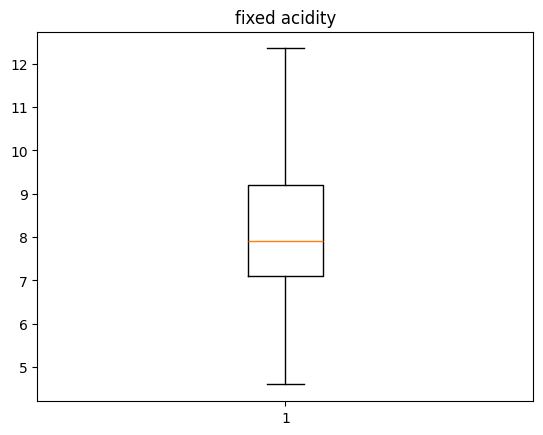

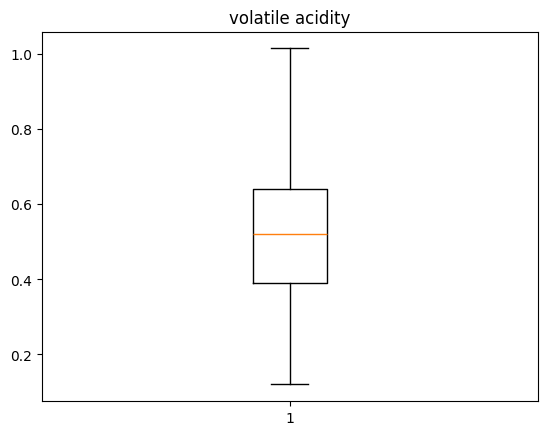

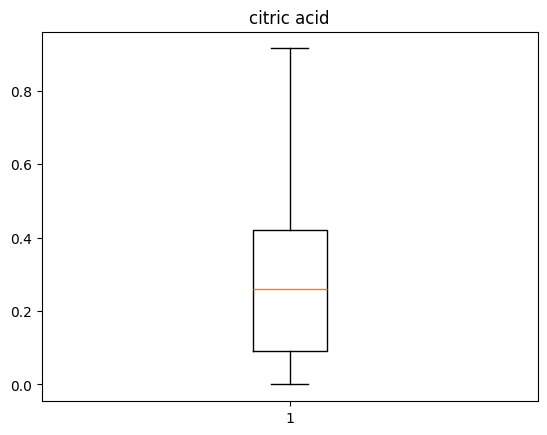

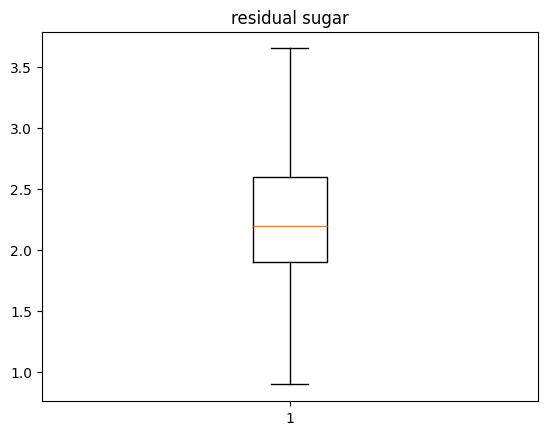

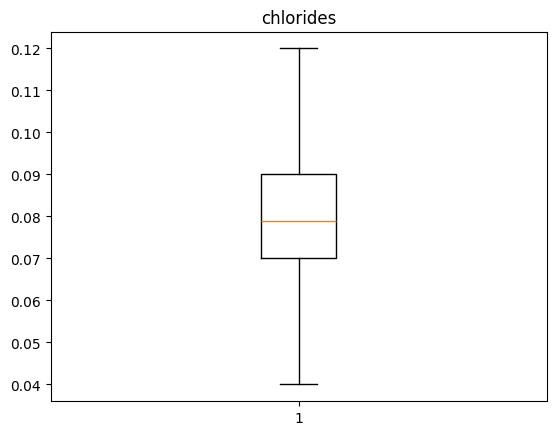

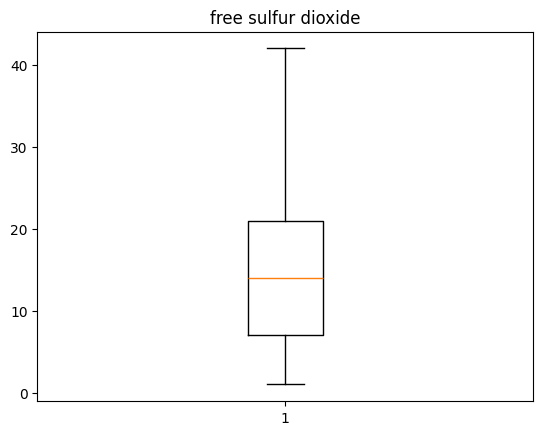

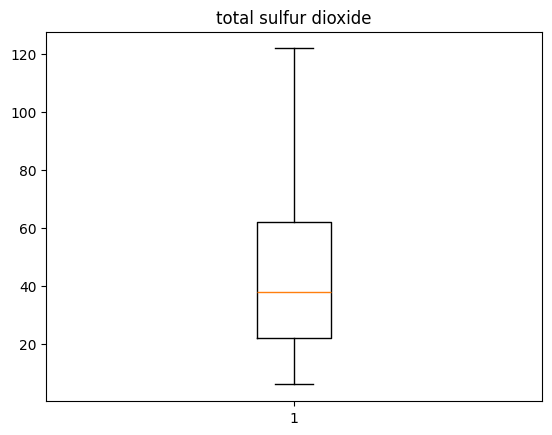

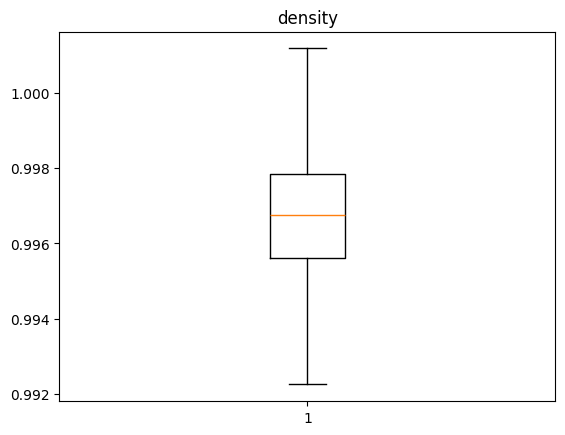

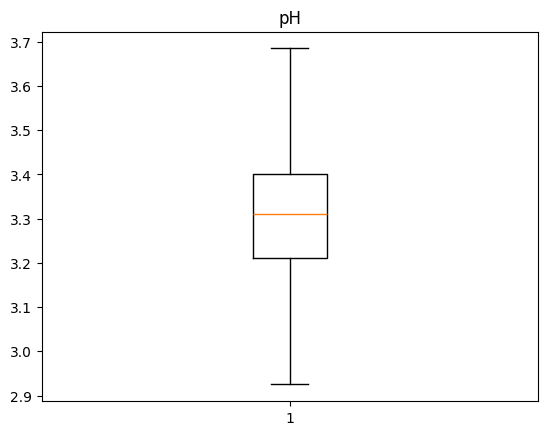

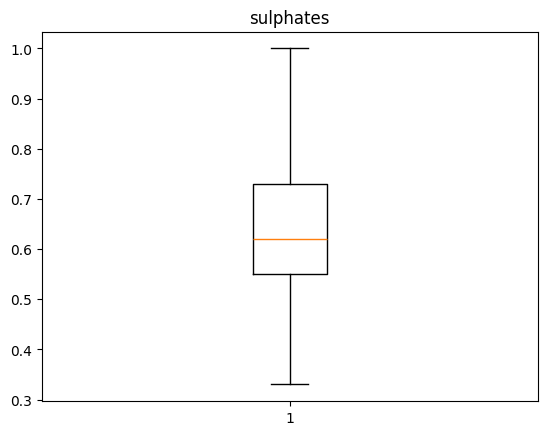

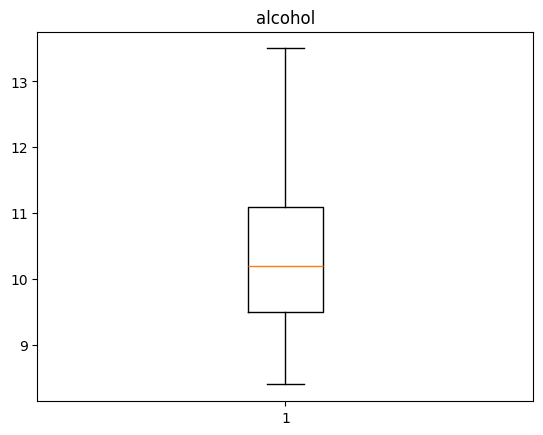

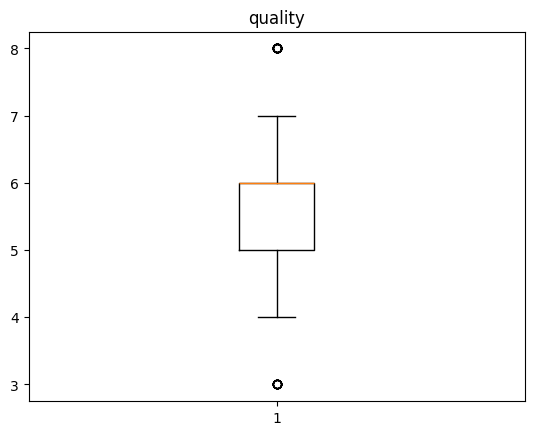

In [66]:
for i in l1:
    plt.boxplot(x=df[i])
    plt.title(i)
    plt.show()

# Data Analysis

# Histogram

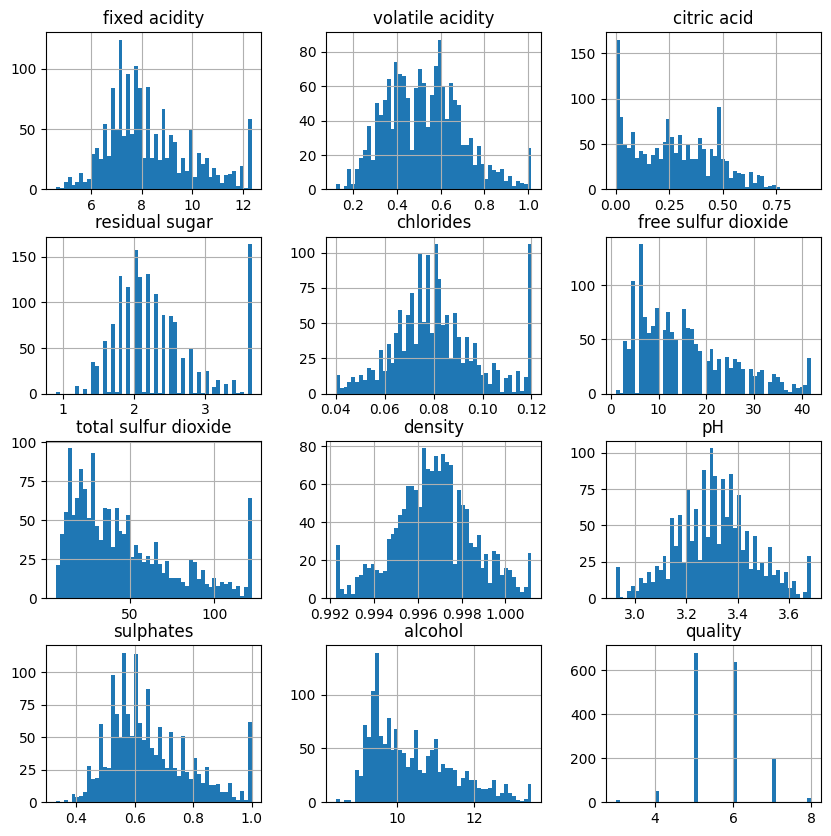

In [67]:
df.hist(figsize=(10,10),bins=50)
plt.show()

# KDE plot

<Axes: xlabel='quality', ylabel='Density'>

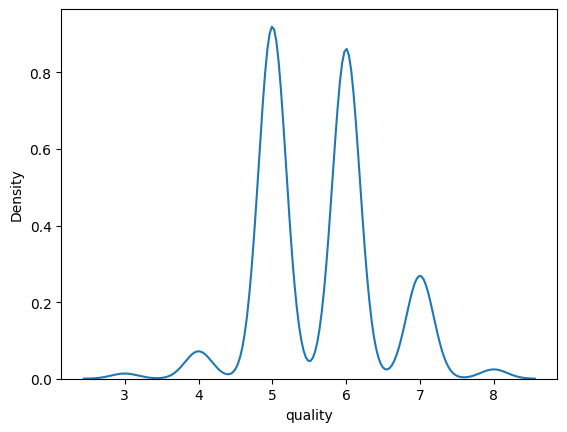

In [68]:
sns.kdeplot(df.query('quality > 2').quality)

# Distplot

<Axes: xlabel='alcohol', ylabel='Density'>

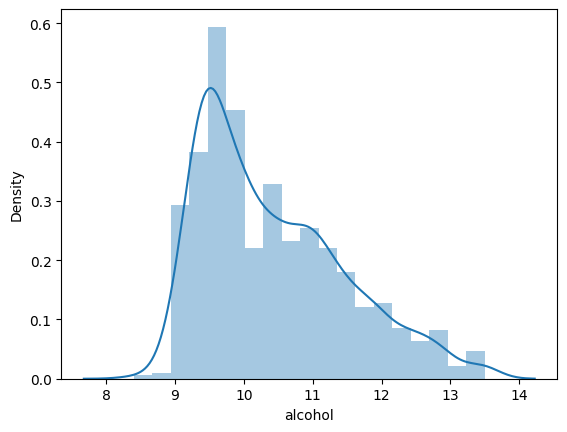

In [69]:
sns.distplot(df['alcohol'])

# Heatmap

<Axes: >

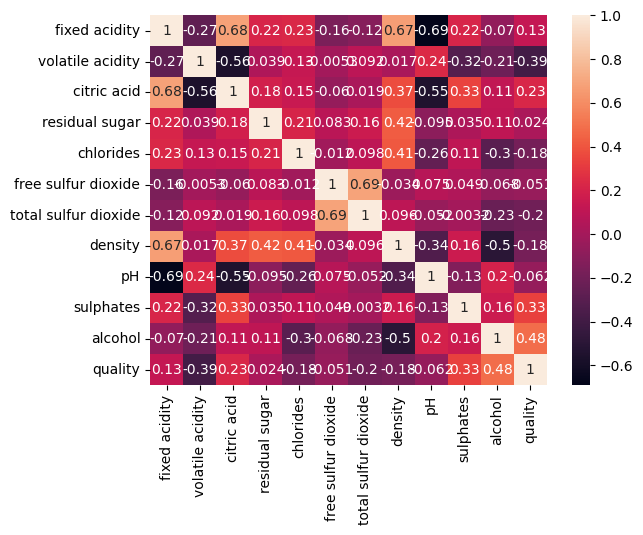

In [70]:
corr = df.corr()
sns.heatmap(corr,annot=True)

# Violin Plot

<Axes: xlabel='quality', ylabel='alcohol'>

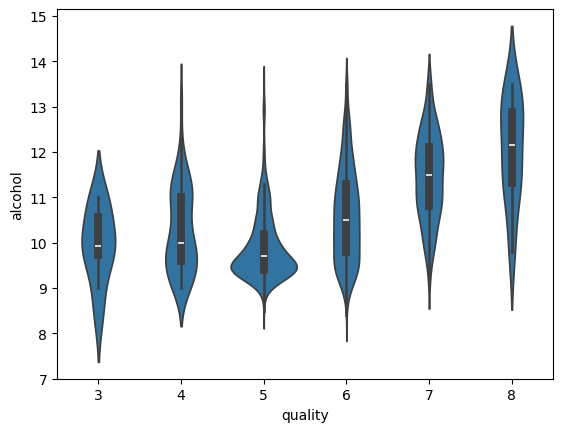

In [71]:
sns.violinplot(x='quality', y='alcohol', data=df)

# Feature Selection

In [72]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [73]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

goodquality
0    1382
1     217
Name: count, dtype: int64

In [74]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [75]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

# Splitting Dataset


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [78]:
from sklearn.linear_model import LogisticRegression
model_wine = LogisticRegression()
model_wine.fit(X_train,Y_train)
Y_pred = model_wine.predict(X_test)

In [79]:
# Training Accuracy
y_pred_train= model_wine.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[935 104]
 [ 30  50]]
************************************************************
Accuracy :  0.8802502234137622
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1039
           1       0.32      0.62      0.43        80

    accuracy                           0.88      1119
   macro avg       0.65      0.76      0.68      1119
weighted avg       0.92      0.88      0.90      1119



In [80]:
# Testing Accuracy
y_pred = model_wine.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[401  44]
 [ 16  19]]
************************************************************
Accuracy :  0.875
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       445
           1       0.30      0.54      0.39        35

    accuracy                           0.88       480
   macro avg       0.63      0.72      0.66       480
weighted avg       0.91      0.88      0.89       480



# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_w = DecisionTreeClassifier(random_state=11)
model_w.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [82]:
# Testing Accuracy
y_pred = model_w.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[373  24]
 [ 44  39]]
************************************************************
Accuracy :  0.8583333333333333
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       397
           1       0.62      0.47      0.53        83

    accuracy                           0.86       480
   macro avg       0.76      0.70      0.73       480
weighted avg       0.85      0.86      0.85       480



In [83]:
# Training Accuracy
y_pred_train= model_w.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[965   0]
 [  0 154]]
************************************************************
Accuracy :  1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       154

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



<function matplotlib.pyplot.show(close=None, block=None)>

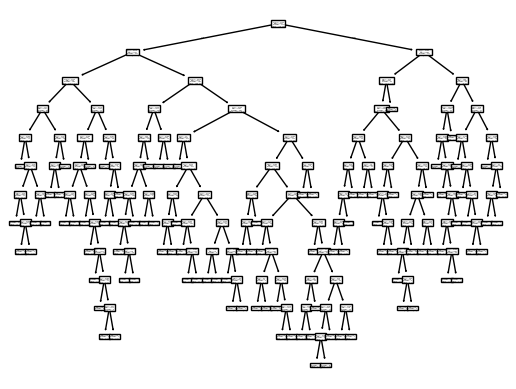

In [84]:
plot_tree(model_w)
plt.show

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [87]:
# Training Accuracy
y_pred_train= model2.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[965   0]
 [  0 154]]
************************************************************
Accuracy :  1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       154

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [88]:
# Testing Accuracy
y_pred = model2.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[398  28]
 [ 19  35]]
************************************************************
Accuracy :  0.9020833333333333
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       426
           1       0.56      0.65      0.60        54

    accuracy                           0.90       480
   macro avg       0.75      0.79      0.77       480
weighted avg       0.91      0.90      0.91       480



# Adaboost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
model3 = AdaBoostClassifier(random_state=30)
model3.fit(X_train, Y_train)
y_pred2 = model3.predict(X_test)

In [91]:
# Training Accuracy
y_pred_train= model3.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[934  64]
 [ 31  90]]
************************************************************
Accuracy :  0.9151027703306523
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       998
           1       0.58      0.74      0.65       121

    accuracy                           0.92      1119
   macro avg       0.78      0.84      0.80      1119
weighted avg       0.93      0.92      0.92      1119



In [92]:
# Testing Accuracy
y_pred = model3.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[391  37]
 [ 26  26]]
************************************************************
Accuracy :  0.86875
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       428
           1       0.41      0.50      0.45        52

    accuracy                           0.87       480
   macro avg       0.68      0.71      0.69       480
weighted avg       0.88      0.87      0.87       480



# Xgboost

In [93]:
import xgboost as xgb
model4 = xgb.XGBClassifier(random_state=1)
model4.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [94]:
# Training Accuracy
y_pred_train= model4.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[965   0]
 [  0 154]]
************************************************************
Accuracy :  1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       965
           1       1.00      1.00      1.00       154

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [95]:
# Testing Accuracy
y_pred = model4.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[391  25]
 [ 26  38]]
************************************************************
Accuracy :  0.89375
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       416
           1       0.60      0.59      0.60        64

    accuracy                           0.89       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.89      0.89      0.89       480



# SVC (Support Vector Machine)

In [96]:
from sklearn.svm import SVC
model5 = SVC()
model5.fit(X_train,Y_train)
pred_y = model5.predict(X_test)

In [97]:
# Training Accuracy
y_pred_train= model5.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[965 154]
 [  0   0]]
************************************************************
Accuracy :  0.8623771224307417
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.86      0.93      1119
           1       0.00      0.00      0.00         0

    accuracy                           0.86      1119
   macro avg       0.50      0.43      0.46      1119
weighted avg       1.00      0.86      0.93      1119



In [98]:
# Testing Accuracy
y_pred = model5.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[417  63]
 [  0   0]]
************************************************************
Accuracy :  0.86875
************************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       480
           1       0.00      0.00      0.00         0

    accuracy                           0.87       480
   macro avg       0.50      0.43      0.46       480
weighted avg       1.00      0.87      0.93       480



In [99]:
# ----->>> Accuracy of the Wine Quality Testing <<<-----

# Logistic Regression = ( Training acc -  :  0.8802502234137622, Testing acc - 0.875)

# Decision Tree = ( Training acc -  1.0, Testing acc - 0.8583333333333333 )

# Random Forest = ( Training acc -   1.0, Testing acc - 0.9020833333333333 )

# Adaboost =   ( Training acc -  0.9151027703306523 , Testing acc - 0.86875 )

# Xgboost =  ( Training acc -  1.0 , Testing acc -  0.89375 )

# SVC = ( Training acc -  0.8623771224307417  , Testing acc -   0.86875 )







